# Movie Recommendation Dataset EDA

본 코드는 김성규 캠퍼님의 '간단한 EDA'코드와 Naver boostcamp ai tech 'Special Mission 1 - Movielense Dataset EDA'코드를 참고하여 작성했습니다.

## 데이터셋 구성

### data
    ├── directors.tsv
    ├── genres.tsv
    ├── titles.tsv
    ├── train_ratings.csv
    ├── writers.tsv
    └── years.tsv
    
1. *train_ratings.csv* : 전체 훈련 데이터.
2. *directors.tsv*, *genres.tsv*, *writers.tsv*, *years.tsv*, *titles.tsv* : 영화의 side-information 데이터.

## Train dataset
train_ratings.csv
- *user*: 사용자 id.
- *item*: 영화 id.
- *time*: 사용자가 해당 영화와 interact한 시간. (UNIX시간의 초 단위)

In [1]:
import pandas as pd
import numpy as np
import os
import copy
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max.colwidth', 100)

In [2]:
data_path = './data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터

In [3]:
train_df.info()
train_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   user    int64
 1   item    int64
 2   time    int64
dtypes: int64(3)
memory usage: 118.0 MB


,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563


In [4]:
num_train_users = train_df['user'].nunique()
num_train_items = train_df['item'].nunique()

print ("Number of unique train users: ", num_train_users)
print ("Number of unique train items: ", num_train_items)

Number of unique train users:  31360
Number of unique train items:  6807


In [5]:
train_df['user'].value_counts()

8405      2912
54465     1980
24219     1842
32514     1830
91349     1795
          ... 
11211       32
128756      28
105578      22
68606       19
53188       16
Name: user, Length: 31360, dtype: int64

영화 시청기록 확인 결과 user 당 최소 16건 이상, 최대 2912건 존재하는 것을 확인할 수 있습니다.

In [6]:
print('1인당 평균 영화시청횟수 :',int(sum(train_df['user'].value_counts()/len(train_df['user'].unique()))))
print('1인당 시청횟수 중앙값(median) :', np.median(train_df['user'].value_counts()))

1인당 평균 영화시청횟수 : 164
1인당 시청횟수 중앙값(median) : 114.0


In [7]:
user_ids = train_df['user'].unique()
max_count = 0

for user in user_ids:
    max_count = max(max_count, train_df[train_df['user']==user]['item'].value_counts().max())

print(max_count)

1


CTR(Click Through Rate)을 활용할 수 있는지 유무를 판단하기 위해 유저가 같은 영화를 최대 몇번 보았는지 확인한 결과 1번이 최대였습니다.

이를 통해 대회에서는 CTR을 활용할 수 없다고 판단했습니다.

In [8]:
# 시청 시간대를 확인하기 위해 병합용 all_train 생성
all_train = train_df.copy()

# 데이터 추가 : time_date(UNIX -> datetime), time_year(년), time_month(월), time_hour(시간), time_day(일)
all_train['time_date'] = pd.to_datetime(all_train['time'], unit='s')
all_train['time_year'] = all_train['time_date'].dt.year
all_train['time_month'] = all_train['time_date'].dt.month
all_train['time_hour'] = all_train['time_date'].dt.hour
all_train['time_day'] = all_train['time_date'].dt.dayofweek
all_train

,user,item,time,time_date,time_year,time_month,time_hour,time_day
0,11,4643,1230782529,2009-01-01 04:02:09,2009,1,4,3
1,11,170,1230782534,2009-01-01 04:02:14,2009,1,4,3
2,11,531,1230782539,2009-01-01 04:02:19,2009,1,4,3
3,11,616,1230782542,2009-01-01 04:02:22,2009,1,4,3
4,11,2140,1230782563,2009-01-01 04:02:43,2009,1,4,3
...,...,...,...,...,...,...,...,...
5154466,138493,44022,1260209449,2009-12-07 18:10:49,2009,12,18,0
5154467,138493,4958,1260209482,2009-12-07 18:11:22,2009,12,18,0
5154468,138493,68319,1260209720,2009-12-07 18:15:20,2009,12,18,0
5154469,138493,40819,1260209726,2009-12-07 18:15:26,2009,12,18,0


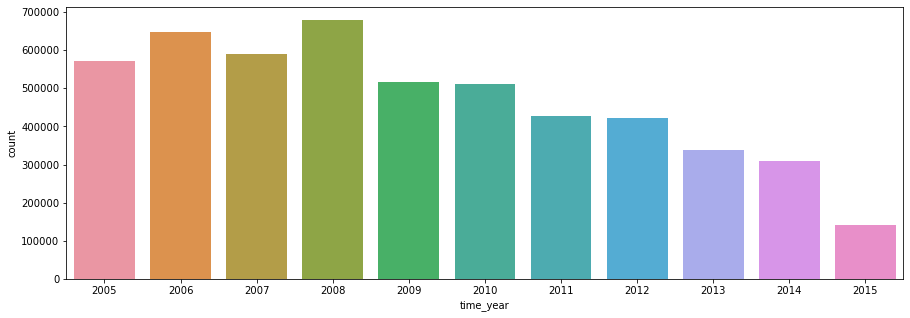

In [9]:
# 시각화 : 연도별 time 컬럼 플롯 시각화
plt.figure(figsize=(15,5))
sns.countplot(x=all_train['time_year'])
plt.show()

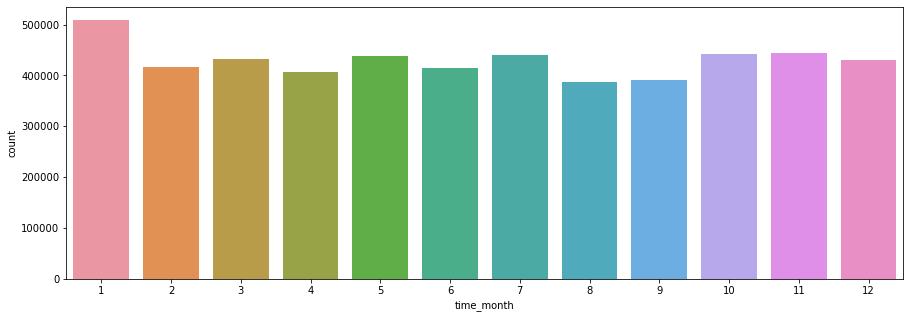

In [10]:
# 시각화 : 월별 time 컬럼 플롯 시각화
plt.figure(figsize=(15,5))
sns.countplot(x=all_train['time_month'])
plt.show()

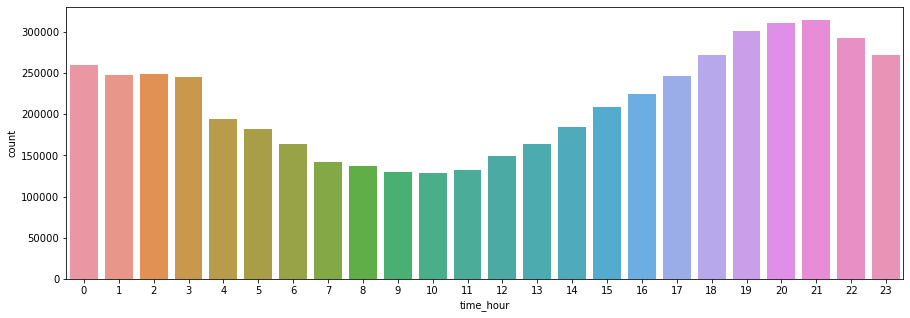

In [11]:
# 시각화 : 시간별 time 컬럼 플롯 시각화
plt.figure(figsize=(15,5))
sns.countplot(x=all_train['time_hour'])
plt.show()

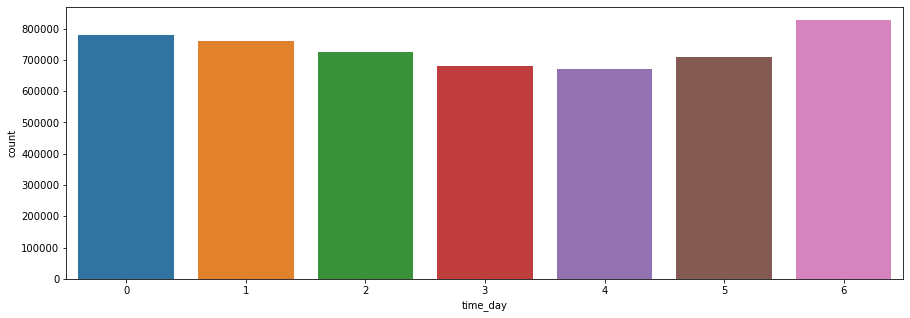

In [12]:
# 시각화 : 요일별 time 컬럼 플롯 시각화
plt.figure(figsize=(15,5))
sns.countplot(x=all_train['time_day'])
plt.show()

시청 기록이 매해 조금씩 줄어드는 양상을 띄며 계절과는 무관한 것을 확인했습니다. 가장 많이 영화를 시청하는 날은 토요일이며, 퇴근 직후 저녁 시간에 많이 시청한다는 것을 확인할 수 있습니다.

In [13]:
print("Data sparsity ratio: ", 1 - len(train_df) / (num_train_users * num_train_items))

Data sparsity ratio:  0.9758536052697853


데이터의 sparsity ratio는 약 97.6%로 일반적인 추천 시스템 데이터셋에 비해 굉장히 dense한 데이터임을 알 수 있습니다.

## Side Information

In [14]:
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

### titles
titles.tsv
- *item* : 영화 id.
- *titles* : 영화 제목.

In [15]:
title_data.info()
title_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    6807 non-null   int64 
 1   title   6807 non-null   object
dtypes: int64(1), object(1)
memory usage: 106.5+ KB


,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)
3,296,Pulp Fiction (1994)
4,356,Forrest Gump (1994)


In [16]:
# 영화 제목(title) 서로 같은 동명의 영화(item) 확인
title_data[title_data['title'].duplicated(keep=False)]

,item,title
349,34048,War of the Worlds (2005)
1926,64997,War of the Worlds (2005)


In [17]:
# 데이터 추가 : titles
all_train = pd.merge(all_train,title_data)
all_train

,user,item,time,time_date,time_year,time_month,time_hour,time_day,title
0,11,4643,1230782529,2009-01-01 04:02:09,2009,1,4,3,Planet of the Apes (2001)
1,189,4643,1302945016,2011-04-16 09:10:16,2011,4,9,5,Planet of the Apes (2001)
2,294,4643,1288437662,2010-10-30 11:21:02,2010,10,11,5,Planet of the Apes (2001)
3,383,4643,1261996844,2009-12-28 10:40:44,2009,12,10,0,Planet of the Apes (2001)
4,421,4643,1190624541,2007-09-24 09:02:21,2007,9,9,0,Planet of the Apes (2001)
...,...,...,...,...,...,...,...,...,...
5154466,126426,102880,1386260290,2013-12-05 16:18:10,2013,12,16,3,After Earth (2013)
5154467,127766,102880,1386261575,2013-12-05 16:39:35,2013,12,16,3,After Earth (2013)
5154468,130972,102880,1391096866,2014-01-30 15:47:46,2014,1,15,3,After Earth (2013)
5154469,131347,102880,1370143675,2013-06-02 03:27:55,2013,6,3,6,After Earth (2013)


In [18]:
print('시청기록이 많은 순')
print(all_train['title'].value_counts()[:10])
print()
print('시청기록이 적은 순 :')
print(all_train['title'].value_counts(ascending=True)[:10])

시청기록이 많은 순
Matrix, The (1999)                                           19699
Fight Club (1999)                                            18437
Pulp Fiction (1994)                                          18202
Shawshank Redemption, The (1994)                             18168
Forrest Gump (1994)                                          17339
Lord of the Rings: The Fellowship of the Ring, The (2001)    17237
Lord of the Rings: The Return of the King, The (2003)        16656
Lord of the Rings: The Two Towers, The (2002)                16387
Silence of the Lambs, The (1991)                             15847
American Beauty (1999)                                       15213
Name: title, dtype: int64

시청기록이 적은 순 :
"Great Performances" Cats (1998)                   27
Pokémon 3: The Movie (2001)                        34
Baby Geniuses (1999)                               34
NeverEnding Story III, The (1994)                  36
You Got Served (2004)                              38
Still Ali

### years
years.tsv
- *item* : 영화 id.
- *year* : 해당 영화가 개봉한 연도.

데이터셋에 한 번 이상 출현하는 영화 작품은 총 6799편이며 평균 개봉 연도는 1992년인 등의 정보를 파악할 수 있습니다.

In [19]:
year_data.info()
year_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   item    6799 non-null   int64
 1   year    6799 non-null   int64
dtypes: int64(2)
memory usage: 106.4 KB


,item,year
0,1348,1922
1,44587,1922
2,4768,1922
3,8235,1923
4,8609,1923


In [20]:
print ("Year data shape: ", year_data.shape)
print("Number of unique items in year_df: ", year_data['item'].nunique())
print("Number of unique years: ", year_data['year'].nunique())
print ("\nStatistics of year data: ")
year_data['year'].describe()

Year data shape:  (6799, 2)
Number of unique items in year_df:  6799
Number of unique years:  93

Statistics of year data: 


count    6799.000000
mean     1992.174732
std        19.052568
min      1922.000000
25%      1985.000000
50%      1999.000000
75%      2006.000000
max      2014.000000
Name: year, dtype: float64

In [21]:
# 결측치 확인 : 연도(year)가 없는 영화(id) 수
not_year = set(all_train['item']) - set(year_data['item'])
print('연도(year)가 없는 영화(id) 수:',len(not_year))
df_not_year = all_train[all_train['item'].isin(not_year)][['item','title']].drop_duplicates().reset_index(drop=True)
df_not_year

연도(year)가 없는 영화(id) 수: 8


,item,title
0,6987,"Cabinet of Dr. Caligari, The (Cabinet des Dr. Caligari., Das) (1920)"
1,3310,"Kid, The (1921)"
2,7243,Intolerance: Love's Struggle Throughout the Ages (1916)
3,8511,"Immigrant, The (1917)"
4,32898,"Trip to the Moon, A (Voyage dans la lune, Le) (1902)"
5,7065,"Birth of a Nation, The (1915)"
6,119145,Kingsman: The Secret Service (2015)
7,6988,Broken Blossoms or The Yellow Man and the Girl (1919)


In [22]:
# 결측치 처리 : 영화 제목 끝부분의 연도 추출
df_add_year = pd.DataFrame([[i,int(t[t.rfind('(')+1:-1])] for i,t in df_not_year.values],columns = ['item','year'])
df_add_year

,item,year
0,6987,1920
1,3310,1921
2,7243,1916
3,8511,1917
4,32898,1902
5,7065,1915
6,119145,2015
7,6988,1919


In [23]:
# 데이터 추가 : year
all_train = pd.merge(all_train,pd.concat([year_data,df_add_year]))
all_train

,user,item,time,time_date,time_year,time_month,time_hour,time_day,title,year
0,11,4643,1230782529,2009-01-01 04:02:09,2009,1,4,3,Planet of the Apes (2001),2001
1,189,4643,1302945016,2011-04-16 09:10:16,2011,4,9,5,Planet of the Apes (2001),2001
2,294,4643,1288437662,2010-10-30 11:21:02,2010,10,11,5,Planet of the Apes (2001),2001
3,383,4643,1261996844,2009-12-28 10:40:44,2009,12,10,0,Planet of the Apes (2001),2001
4,421,4643,1190624541,2007-09-24 09:02:21,2007,9,9,0,Planet of the Apes (2001),2001
...,...,...,...,...,...,...,...,...,...,...
5154466,126426,102880,1386260290,2013-12-05 16:18:10,2013,12,16,3,After Earth (2013),2013
5154467,127766,102880,1386261575,2013-12-05 16:39:35,2013,12,16,3,After Earth (2013),2013
5154468,130972,102880,1391096866,2014-01-30 15:47:46,2014,1,15,3,After Earth (2013),2013
5154469,131347,102880,1370143675,2013-06-02 03:27:55,2013,6,3,6,After Earth (2013),2013


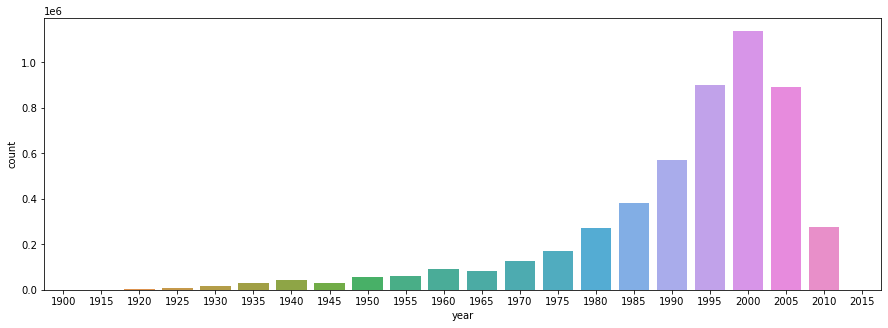

In [24]:
# 시각화 : 5년별 year 컬럼 플롯 시각화
plt.figure(figsize=(15,5))
sns.countplot(x=all_train['year'] // 5 * 5)
plt.show()

### genres
genres.tsv
- *item* : 영화 id.
- *genre* : 영화의 장르.

In [25]:
genre_data.info()
genre_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15933 entries, 0 to 15932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    15933 non-null  int64 
 1   genre   15933 non-null  object
dtypes: int64(1), object(1)
memory usage: 249.1+ KB


,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller


In [26]:
# 모든 영화(item)에 장르(genre)가 존재하는지 확인
set(all_train.item) == set(genre_data.item)

True

In [27]:
# 총 장르 수
genre_data['genre'].nunique()

18

In [28]:
# 한 영화(item)당 장르(genre) 수
genre_data['item'].value_counts()

81132     10
26701      8
4719       7
2987       7
56152      7
          ..
27329      1
86852      1
103624     1
97673      1
8130       1
Name: item, Length: 6807, dtype: int64

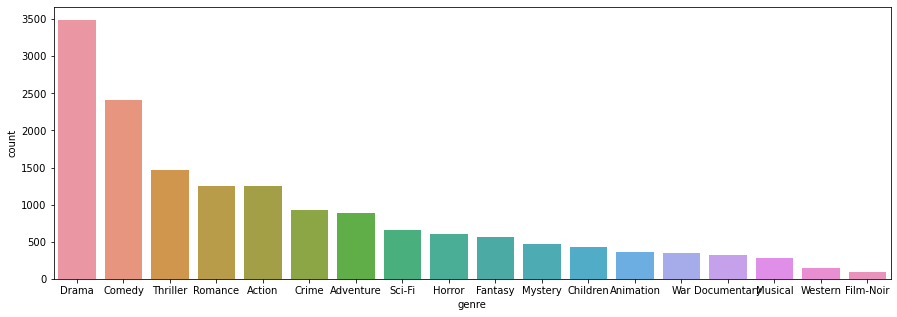

In [29]:
# 시각화 : genre별 등장 횟수 플롯 시각화
plt.figure(figsize=(15,5))
sns.countplot(x=genre_data['genre'],order = genre_data['genre'].value_counts().index)
plt.show()

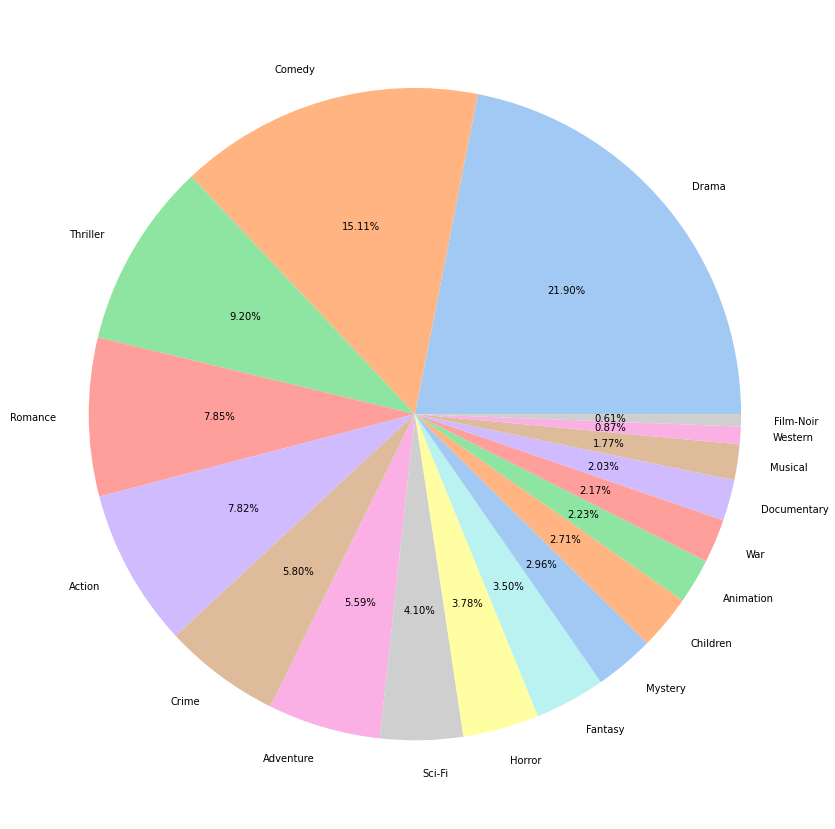

In [30]:
# 시각화 : genre별 등장 횟수 파이 시각화
plt.figure(figsize=(15,15))
labels, data = zip(*genre_data['genre'].value_counts().items())
plt.pie(data, labels = labels, colors = sns.color_palette('pastel'), autopct='%.2f%%')
plt.show()

### Writers
column
- *item* : 영화 id.
- *writer* : 영화의 각본가. (익명화)

In [31]:
writer_data.info()
writer_data.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11306 entries, 0 to 11305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    11306 non-null  int64 
 1   writer  11306 non-null  object
dtypes: int64(1), object(1)
memory usage: 176.8+ KB


,item,writer
0,1237,nm0000005
1,5147,nm0000005


In [32]:
print('고유 writer_data item 수:',writer_data.item.nunique())
print('고유 writer_data writer 수:',writer_data.writer.nunique())

고유 writer_data item 수: 5648
고유 writer_data writer 수: 2989


In [33]:
# 한 영화(item)당 각본가(writer) 참여 수
writer_data['item'].value_counts()

1907     24
783      23
364      21
2687     21
48322    19
         ..
79073     1
176       1
2560      1
42007     1
1237      1
Name: item, Length: 5648, dtype: int64

In [34]:
# 한 각본가(writer)당 영화(item) 참여 수
writer_data['writer'].value_counts()

nm0000095    47
nm0000636    35
nm0000175    32
nm0372942    30
nm0000108    29
             ..
nm0414893     2
nm0414448     2
nm0414117     2
nm0414047     2
nm5927608     2
Name: writer, Length: 2989, dtype: int64

In [35]:
# 각본가(writer)가 없는 영화(id) 수
not_writer = set(all_train['item']) - set(writer_data['item'])
print('각본가(writer)가 없는 영화(id) 수:',len(not_writer))
df_not_writer = all_train[all_train['item'].isin(not_writer)][['item','title']].drop_duplicates().reset_index(drop=True)
df_not_writer

각본가(writer)가 없는 영화(id) 수: 1159


,item,title
0,170,Hackers (1995)
1,5151,40 Days and 40 Nights (2002)
2,33585,9 Songs (2004)
3,1225,Amadeus (1984)
4,59418,"American Crime, An (2007)"
...,...,...
1154,30,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
1155,79590,"Rebound, The (2009)"
1156,90524,Abduction (2011)
1157,75395,Frozen (2010)


### directors
directors.tsv
- *item* : 영화 id.
- *director* : 영화 감독. (익명화)

In [36]:
director_data.info()
director_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5905 entries, 0 to 5904
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item      5905 non-null   int64 
 1   director  5905 non-null   object
dtypes: int64(1), object(1)
memory usage: 92.4+ KB


,item,director
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [37]:
print('고유 director_data item 수:',director_data.item.nunique())
print('고유 director_data director 수:',director_data.director.nunique())

고유 director_data item 수: 5503
고유 director_data director 수: 1340


In [38]:
# 한 영화(item)당 감독(director) 참여 수
director_data['item'].value_counts()

50912    14
1282     10
27002     8
7502      7
596       7
         ..
163       1
70        1
6566      1
5504      1
55768     1
Name: item, Length: 5503, dtype: int64

In [39]:
# 한 감독(director)당 영화(item) 참여 수
director_data['director'].value_counts()

nm0000095    44
nm0000033    33
nm0000142    31
nm0000229    29
nm0000217    26
             ..
nm0404606     2
nm0405605     2
nm0410139     2
nm0410769     2
nm9054338     2
Name: director, Length: 1340, dtype: int64

In [40]:
# 감독(director)이 없는 영화(id) 수
not_director = set(all_train['item']) - set(director_data['item'])
print('감독(director)이 없는 영화(id) 수:',len(not_director))
df_not_director = all_train[all_train['item'].isin(not_director)][['item','title']].drop_duplicates().reset_index(drop=True)
df_not_director

감독(director)이 없는 영화(id) 수: 1304


,item,title
0,1591,Spawn (1997)
1,2793,"American Werewolf in Paris, An (1997)"
2,33085,"Amityville Horror, The (2005)"
3,31184,Appleseed (Appurushîdo) (2004)
4,34338,"Aristocrats, The (2005)"
...,...,...
1299,82093,London Boulevard (2010)
1300,75395,Frozen (2010)
1301,842,Tales from the Crypt Presents: Bordello of Blood (1996)
1302,5999,Heavy Metal 2000 (2000)
